## Model Training

#### 1.1 Import Data and Required Packages


In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [7]:
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [8]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [12]:
X = preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

#### Train Test Split

In [13]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_train_list = []  # To store Train R2 scores
r2_test_list = []   # To store Test R2 scores
mae_train_list = []
rmse_train_list = []
mae_test_list = []
rmse_test_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    # Append metrics to lists
    r2_train_list.append(model_train_r2)
    r2_test_list.append(model_test_r2)
    mae_train_list.append(model_train_mae)
    rmse_train_list.append(model_train_rmse)
    mae_test_list.append(model_test_mae)
    rmse_test_list.append(model_test_rmse)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

### Results

In [23]:
results_df = pd.DataFrame(list(zip(model_list, r2_train_list, mae_train_list, rmse_train_list, r2_test_list, mae_test_list, rmse_test_list)), 
                          columns=['Model Name', 'Train R2', 'Train MAE', 'Train RMSE', 'Test R2', 'Test MAE', 'Test RMSE'])

# Sort the DataFrame by Test R2 and then by Train R2 in descending order
results_df = results_df.sort_values(by=["Test R2", "Train R2"], ascending=False)

# Function to apply custom color formatting
def highlight_max_min(s):
    # Initialize a list to hold the style for each row
    styles = []
    
    # Logic for highlighting
    for value in s:
        if s.name == "Train R2" or s.name == "Test R2":  # For R2 scores, highest is good
            if value == s.max():  # Green for highest R2
                styles.append('background-color: green')
            elif value == s.min():  # Red for lowest R2
                styles.append('background-color: red')
            else:
                styles.append('')
        elif s.name in ['Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE']:  # For MAE and RMSE, lowest is good
            if value == s.min():  # Green for lowest error (MAE/RMSE)
                styles.append('background-color: green')
            elif value == s.max():  # Red for highest error (MAE/RMSE)
                styles.append('background-color: red')
            else:
                styles.append('')
    
    return styles

# Apply the highlight function to the relevant columns
styled_results = results_df.style.apply(highlight_max_min, subset=['Train R2', 'Train MAE', 'Train RMSE', 'Test R2', 'Test MAE', 'Test RMSE'], axis=0)

# Show the styled DataFrame
styled_results


,Model Name,Train R2,Train MAE,Train RMSE,Test R2,Test MAE,Test RMSE
2,Ridge,0.874304,4.264988,5.323325,0.880593,4.211101,5.390387
0,Linear Regression,0.874317,4.266712,5.323051,0.880433,4.214763,5.393994
5,Random Forest Regressor,0.976706,1.827371,2.291614,0.851507,4.608675,6.011152
7,AdaBoost Regressor,0.852042,4.741100,5.775532,0.850173,4.724659,6.038098
6,XGBRegressor,0.995500,0.687467,1.007282,0.827797,5.057731,6.473307
1,Lasso,0.807146,5.206303,6.593816,0.825320,5.157882,6.519695
3,K-Neighbors Regressor,0.855498,4.516750,5.707683,0.783813,5.621000,7.253041
4,Decision Tree,0.999653,0.018750,0.279508,0.758567,6.130000,7.664855


    Models perform very well
- Random Forest Regressor
- XGBRegressor
- Ridge 



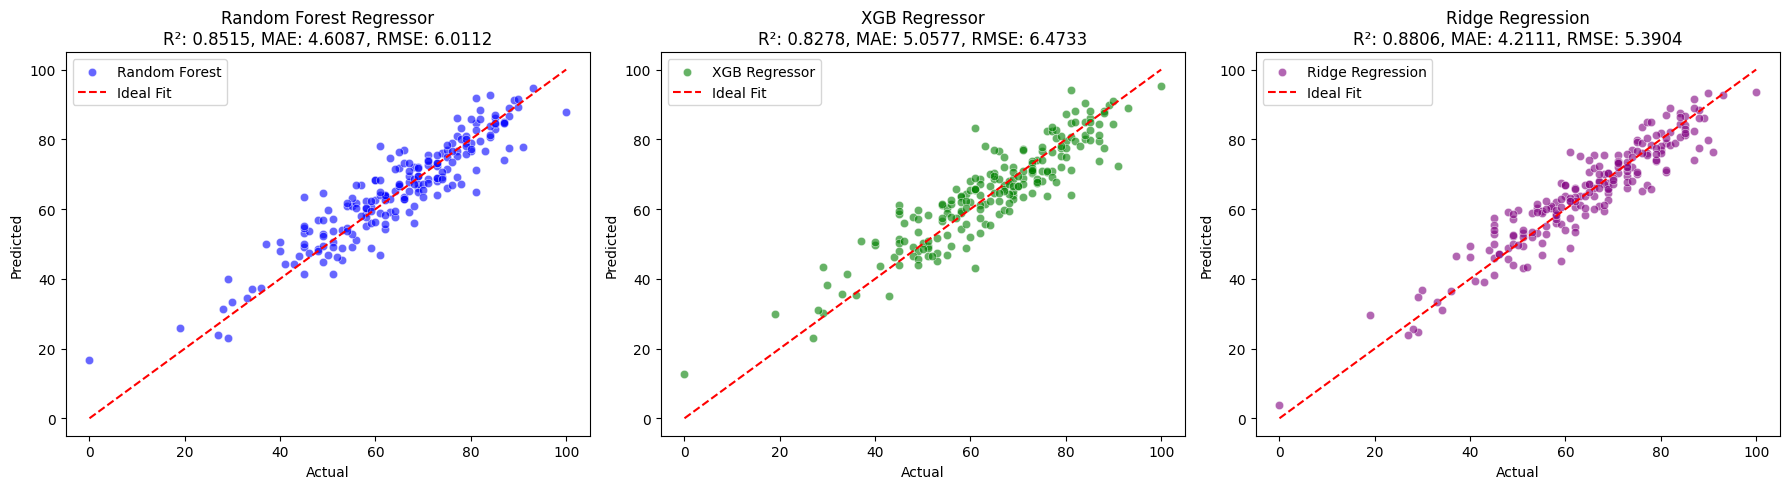

In [26]:


# Make predictions for each model
y_pred_rf = models["Random Forest Regressor"].predict(X_test)
y_pred_xgb = models["XGBRegressor"].predict(X_test)
y_pred_ridge = models["Ridge"].predict(X_test)

# Calculate performance metrics for each model
# For RMSE, ensure it's squared=False if scikit-learn >= 0.24
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))  # Manually calculate RMSE if necessary
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Manually calculate RMSE if necessary
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))  # Manually calculate RMSE if necessary
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Plotting the results
plt.figure(figsize=(18, 5))

# Random Forest Regressor Plot
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', alpha=0.6, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title(f'Random Forest Regressor\nR²: {r2_rf:.4f}, MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# XGBRegressor Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_xgb, color='green', alpha=0.6, label='XGB Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title(f'XGB Regressor\nR²: {r2_xgb:.4f}, MAE: {mae_xgb:.4f}, RMSE: {rmse_xgb:.4f}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# Ridge Regression Plot
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_ridge, color='purple', alpha=0.6, label='Ridge Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title(f'Ridge Regression\nR²: {r2_ridge:.4f}, MAE: {mae_ridge:.4f}, RMSE: {rmse_ridge:.4f}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### <span style="color:green;font-weight: bold;"><b>Insights</b></span>
    Overall Observations:
<ul>
  <li><b><span style="color:red;">Positive Correlation:</span></b> All three models exhibit a strong positive correlation between predicted and actual values, indicating that they are able to capture the underlying relationship in the data and make reasonable predictions.</li>
  
  <li><b><span style="color:red;">Scatter:</span></b> The scatter points are not perfectly aligned along the ideal fit line (y=x), indicating that there is some degree of prediction error in each model.</li>
</ul>


    Model-Specific Observations:
    <ul>
  <li><b><span style="color:red;">Random Forest:</span></b> The scatter plot for Random Forest shows a moderate spread of points around the ideal fit line, suggesting that the model captures the general trend well, but there might be some instances of larger prediction errors.</li>
  
  <li><b><span style="color:red;">XGBoost:</span></b> The scatter plot for XGBoost appears to have a tighter clustering of points around the ideal fit line compared to Random Forest, suggesting that XGBoost might be making more accurate predictions on average.</li>
  
  <li><b><span style="color:red;">Ridge Regression:</span></b> The scatter plot for Ridge Regression shows a relatively tight clustering of points around the ideal fit line, similar to XGBoost, indicating that Ridge Regression is also performing well in terms of prediction accuracy.</li>
</ul>


    Metrics:
<ul>
  <li><b><span style="color:red;">XGBoost:</span></b> Generally has the highest R-squared value and the lowest MAE and RMSE values, indicating the best overall performance among the models.</li>
  
  <li><b><span style="color:red;">Ridge Regression:</span></b> Comes second, with slightly lower performance than XGBoost, but still shows strong predictive capabilities.</li>
  
  <li><b><span style="color:red;">Random Forest:</span></b> Has the lowest R-squared and the highest MAE and RMSE values, suggesting it may have slightly higher prediction errors compared to the other two models.</li>
</ul>




   <h1 style="color:yellow;"><b>Conclusions</b></h1>
<ul>
  <li><b><span style="color:red;">XGBoost and Ridge Regression:</span></b> Appear to be the most accurate models based on the provided metrics and visual analysis.</li>
  <li><b><span style="color:red;">All Models:</span></b> Show a strong positive correlation between predicted and actual values, indicating their ability to capture the underlying patterns in the data.</li>
</ul>
